In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [27]:
def boxplots_1(data, title=''):
    plt.figure(figsize=(12,5))

    sns.boxplot(data=data[data['METHOD'] == 'coK'], 
                x='METHOD', y='RMSE', width=0.2, linecolor='k', 
                boxprops={"facecolor": 'gray'}, zorder=2, ax=plt.gca())

    sns.boxplot(data=data[data['METHOD'] != 'coK'],
                x='METHOD', y='RMSE', hue='N', width=0.8,
                palette=sns.color_palette("Blues", 5), linecolor='k',
                zorder=2, ax=plt.gca())

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='N')
    plt.axhline(data[data['METHOD'] == 'coK']['RMSE'].median(), ls='--', c='r', lw=1)
    plt.title(title)
    plt.grid(axis='y', zorder=1);


def boxplots_2(data, title=''):
    plt.figure(figsize=(12,5))
    sns.boxplot(data=data[data['N'] == 5_000], 
                x='METHOD', y='RMSE', width=0.2, linecolor='k', 
                boxprops={"facecolor": 'gray'}, zorder=2, ax=plt.gca())

    sns.boxplot(data=data[data['N'] != 5_000],
                x='N', y='RMSE', hue='METHOD', width=0.6,
                palette='pastel', linecolor='k',
                zorder=2, ax=plt.gca())

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='METHOD')
    plt.xlabel('N')
    plt.title(title)
    plt.axhline(data[data['METHOD'] == 'coK']['RMSE'].median(), ls='--', c='r', lw=1)
    plt.grid(axis='y', zorder=1);

# $d=2$

In [28]:
d = 2

In [29]:
data = pd.read_csv(f'results_experiments_d_{d}.csv', sep=';')

data[['nu_1', 'nu_2']] = data[['nu_1', 'nu_2']].replace({0.5:'1/2', 2.5:'5/2'})
data['theta_2'] = data['theta_2'].replace({5.0:'5'})
data.head()

,METHOD,N,K,TIME,RMSE,n,nu_1,nu_2,theta_1,theta_2
0,coKNN,1000,5,26.750026,0.139021,5000,1/2,1/2,2,2.5
1,NcoK KM,1000,5,55.702301,0.139240,5000,1/2,1/2,2,2.5
2,NcoK KM+,1000,5,53.782467,0.137827,5000,1/2,1/2,2,2.5
3,coKNN,500,10,6.044639,0.139017,5000,1/2,1/2,2,2.5
4,NcoK KM,500,10,28.900970,0.138943,5000,1/2,1/2,2,2.5


In [30]:
groups = data.groupby(by=['n', 'nu_1', 'nu_2', 'theta_1', 'theta_2'])

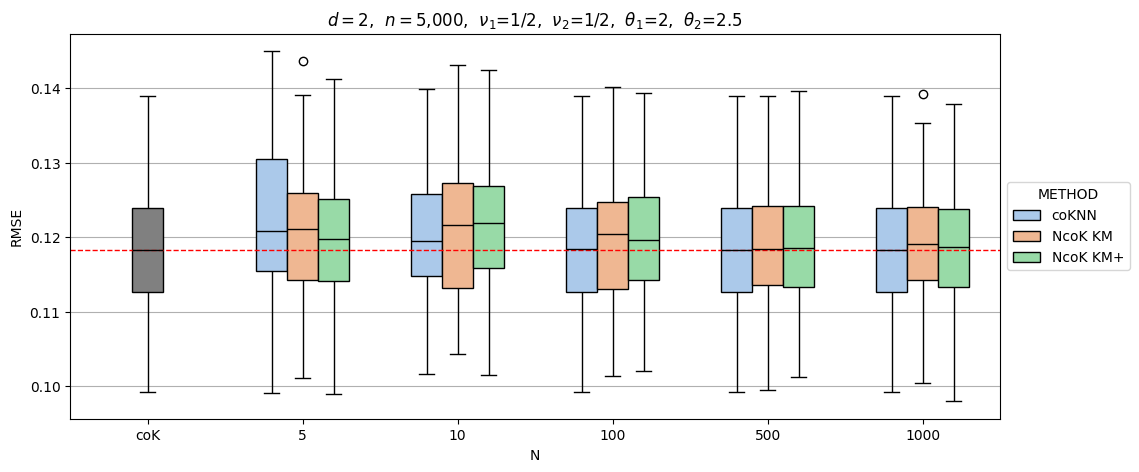

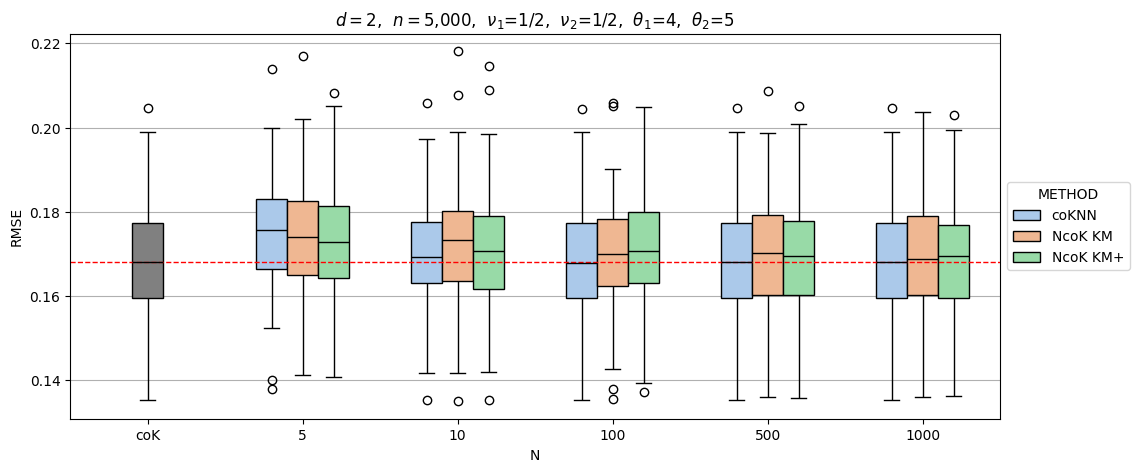

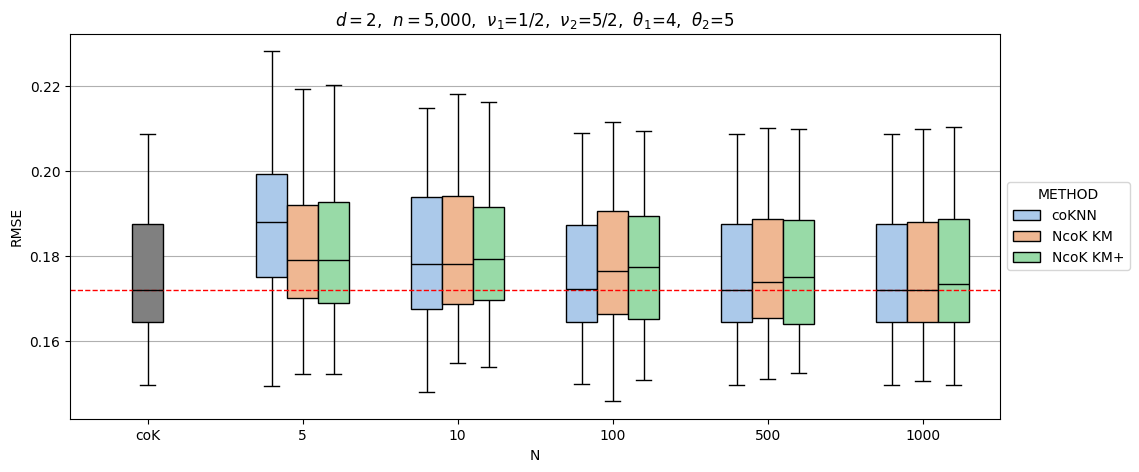

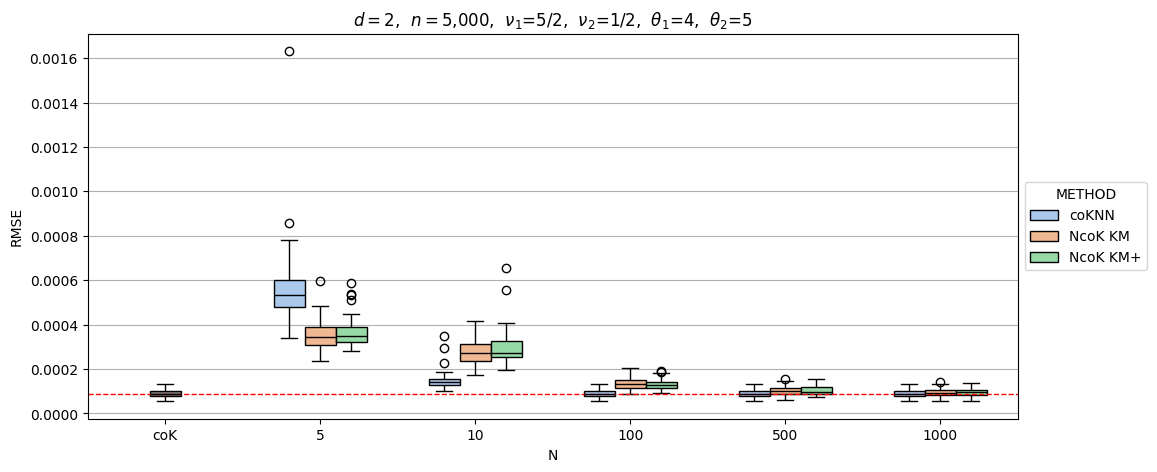

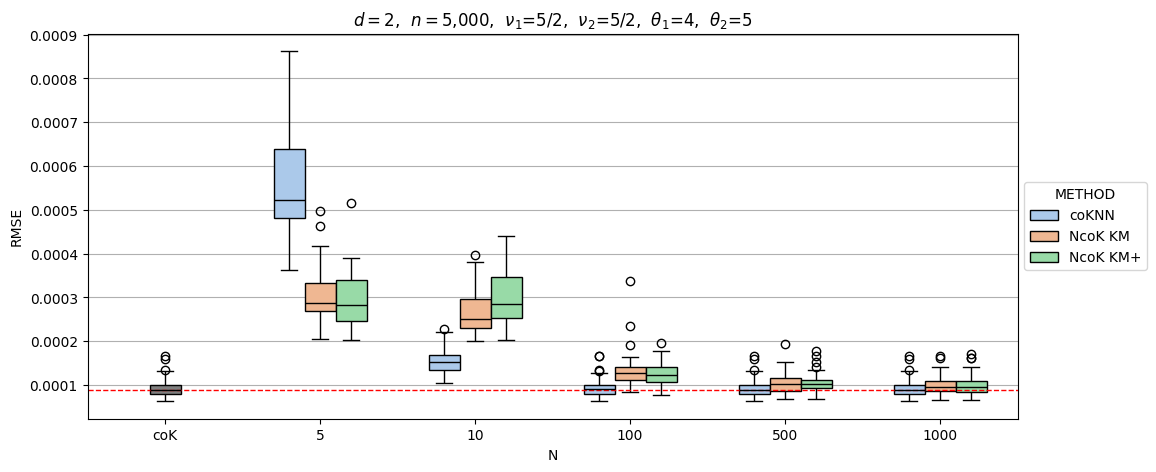

In [31]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_2(group, title)
    # break

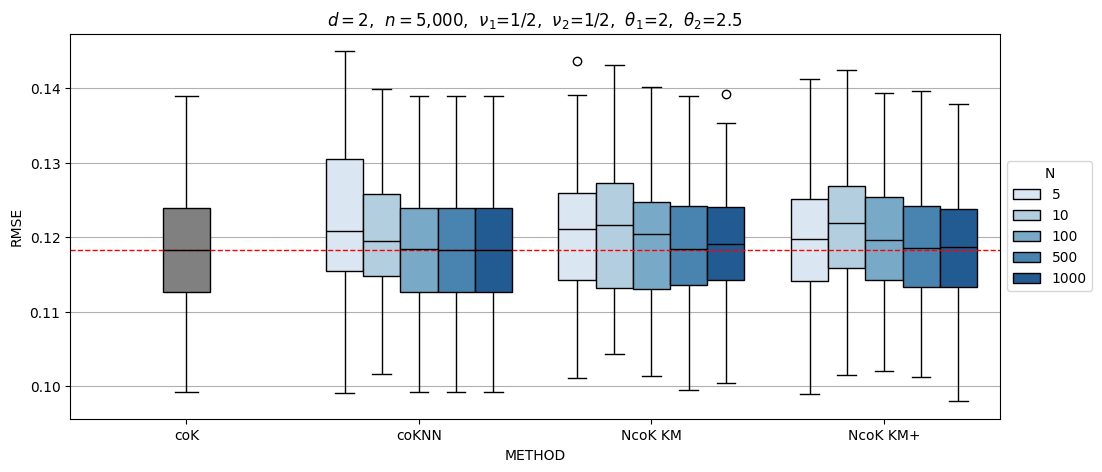

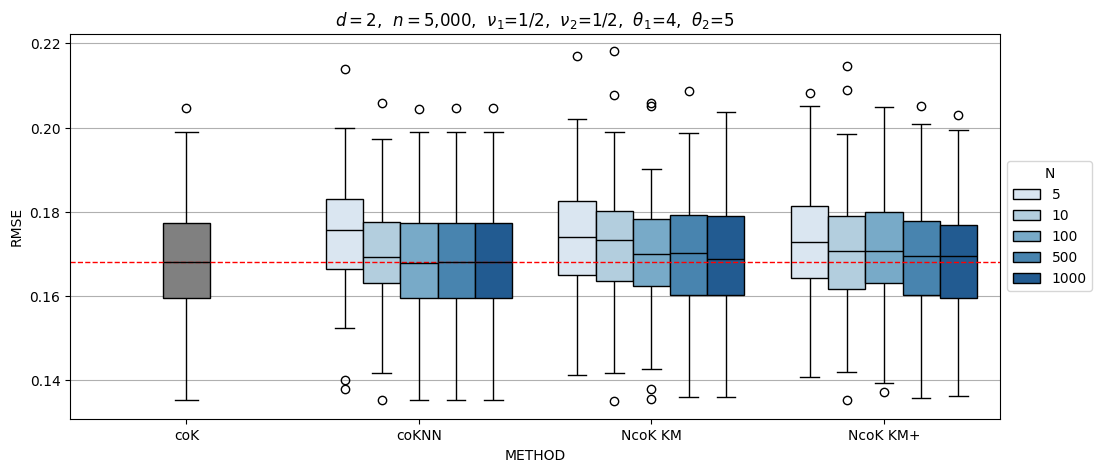

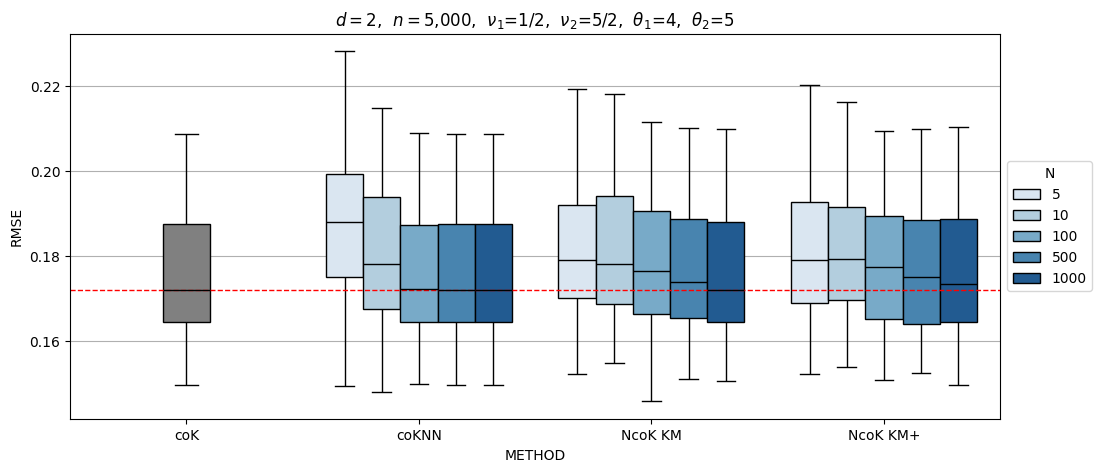

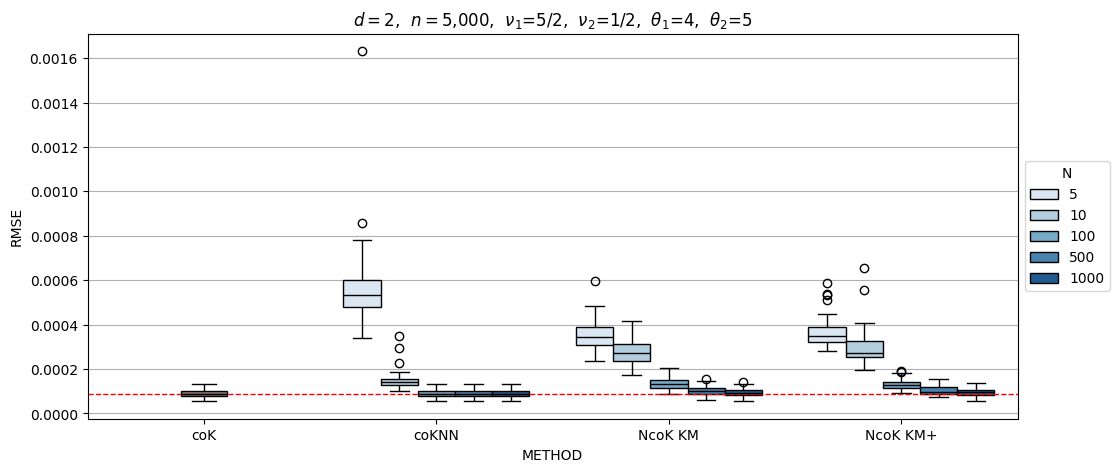

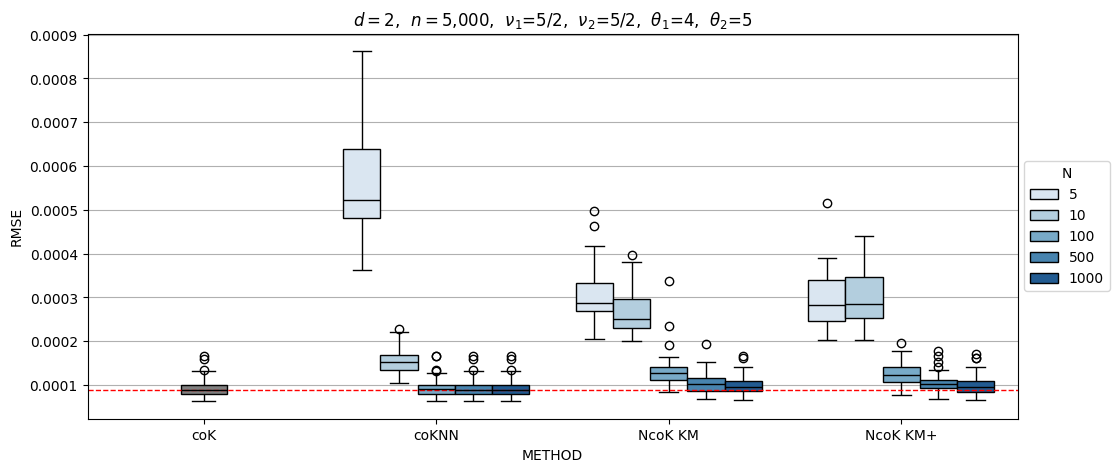

In [32]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, title)
    # break

# $d=3$

In [33]:
d = 3

In [34]:
data = pd.read_csv(f'results_experiments_d_{d}.csv', sep=';')

data[['nu_1', 'nu_2']] = data[['nu_1', 'nu_2']].replace({0.5:'1/2', 2.5:'5/2'})
data['theta_1'] = data['theta_1'].replace({2.0:'2', 4.0:'4'})
data['theta_2'] = data['theta_2'].replace({5.0:'5'})
data.head()

,METHOD,N,K,TIME,RMSE,n,nu_1,nu_2,theta_1,theta_2
0,coKNN,1000,5,21.629719,0.270550,5000.0,1/2,1/2,2,2.5
1,NcoK KM,1000,5,64.293552,0.273641,5000.0,1/2,1/2,2,2.5
2,NcoK KM+,1000,5,137.734451,0.276366,5000.0,1/2,1/2,2,2.5
3,coKNN,500,10,22.283544,0.270611,5000.0,1/2,1/2,2,2.5
4,NcoK KM,500,10,123.049370,0.272795,5000.0,1/2,1/2,2,2.5


In [35]:
groups = data.groupby(by=['n', 'nu_1', 'nu_2', 'theta_1', 'theta_2'])

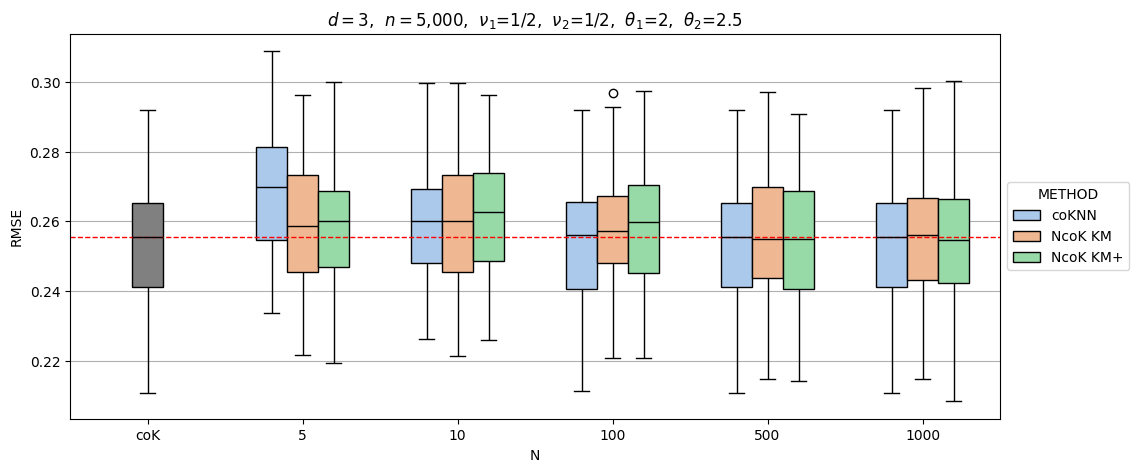

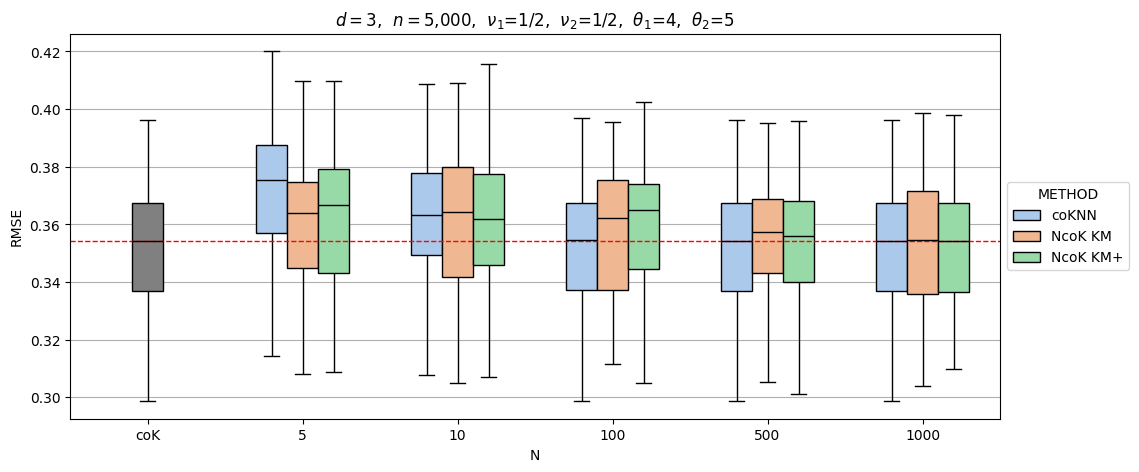

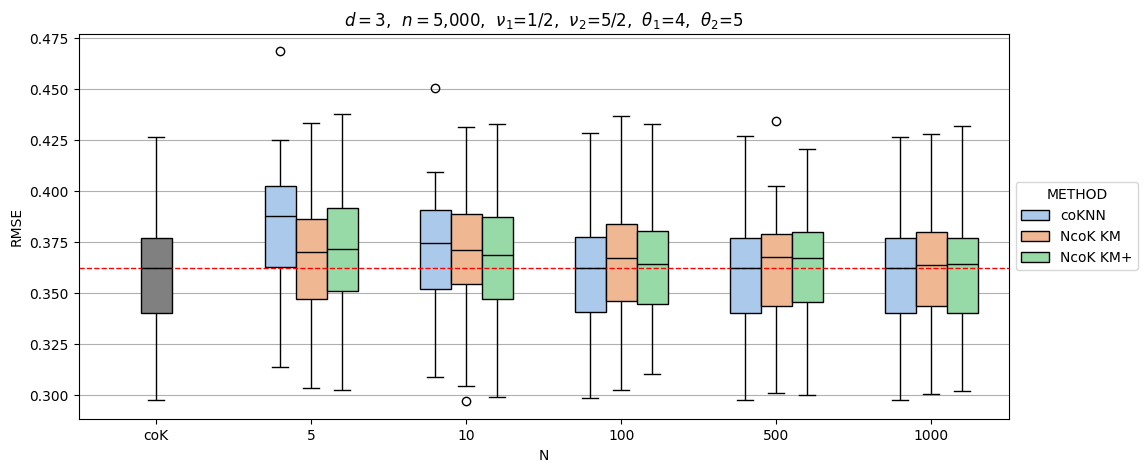

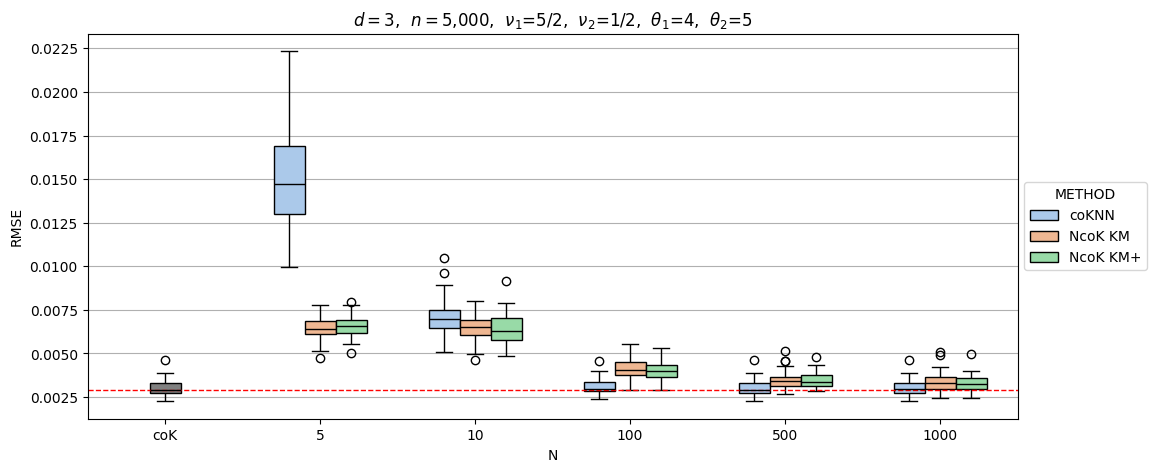

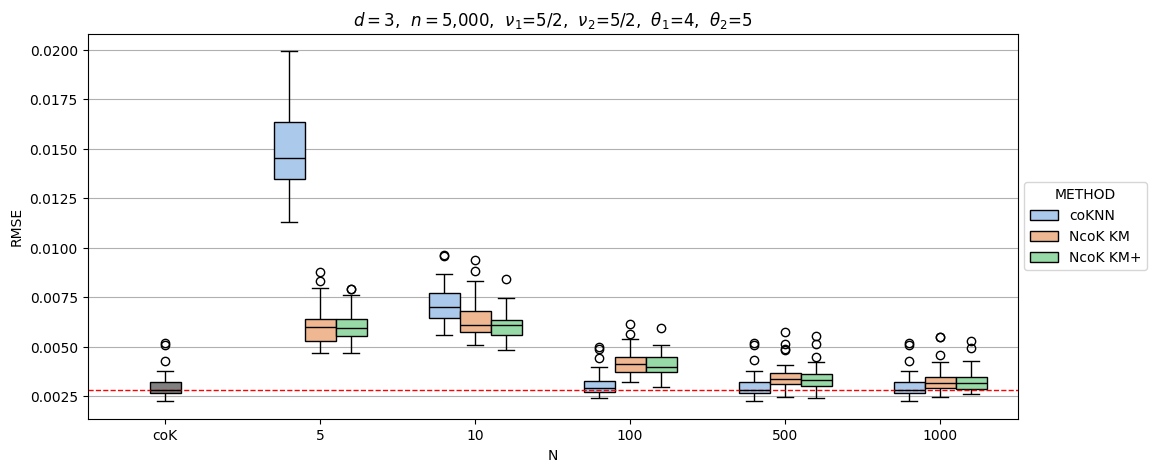

In [36]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_2(group, title)
    # break

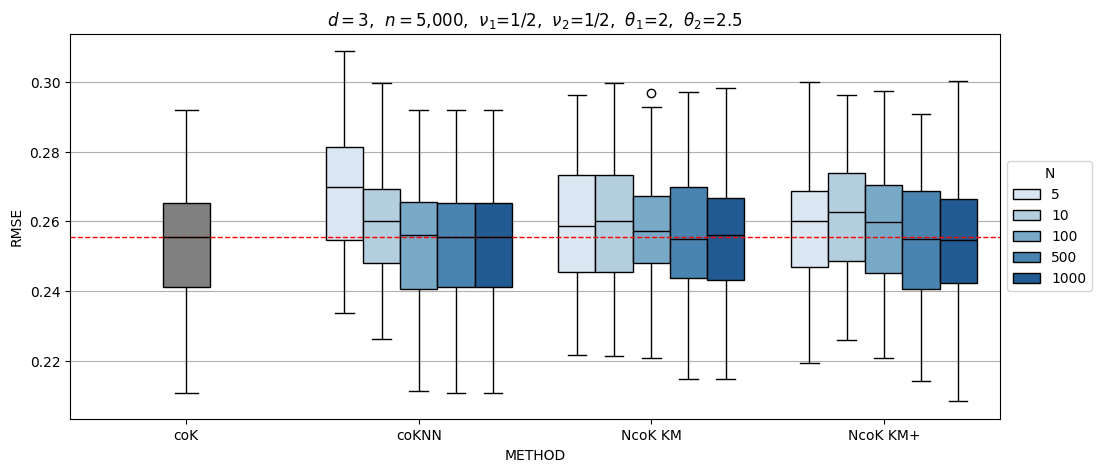

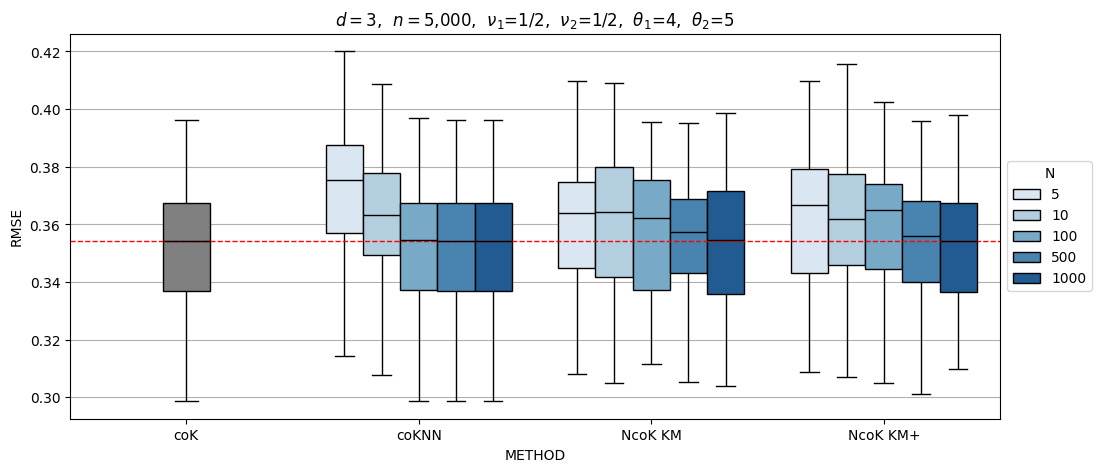

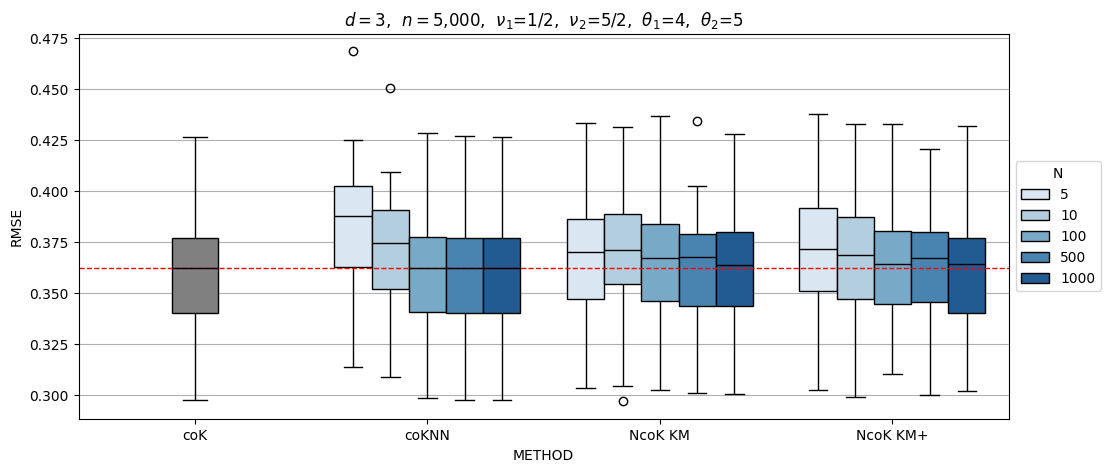

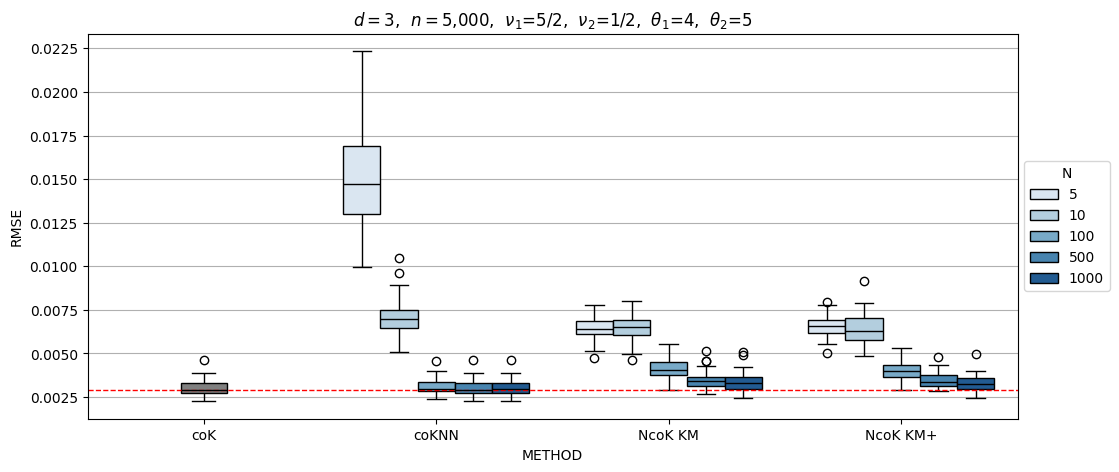

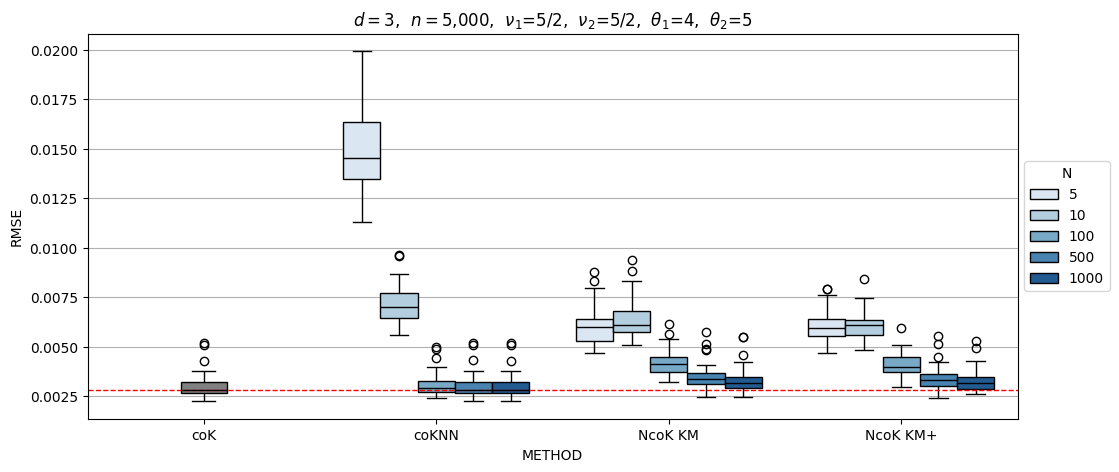

In [37]:
for key, group in groups:
    title = f'$d={d}$,  $n=${key[0]:,.0f},  $\\nu_1$={key[1]},  $\\nu_2$={key[2]},  $\\theta_1$={key[3]},  $\\theta_2$={key[4]}'
    boxplots_1(group, title)
    # break